
MNIST Digit Classification with K-Nearest Neighbors (KNN)
=========================================================

This notebook demonstrates a complete workflow for handwritten digit classification using the MNIST dataset and a K-Nearest Neighbors (KNN) model.

Overview:
---------
- The MNIST dataset, loaded from OpenML, consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28x28 pixels.
- We preprocess the data and split it into training and testing sets to evaluate model performance.
- A simple KNN classifier (k=3) is trained to recognize digits from pixel data.
- In addition, the notebook integrates user-supplied digit images from Google Drive, processes them to match MNIST format, and predicts the digit using the trained model.
- Visualization of both original and preprocessed images is included along with model predictions.

Steps:
------
1. Load the MNIST dataset and prepare input/output arrays.
2. Train a KNN model using Scikit-learn.
3. Mount Google Drive and load external PNG digit images.
4. Process each image:
   - Convert to grayscale
   - Invert pixel values (black-on-white to white-on-black)
   - Resize to 28x28 pixels
   - Normalize pixel values to range [0, 1]
5. Predict digits using the trained model and display results.

Requirements:
-------------
- Python (3.7+ recommended)
- Libraries: numpy, pandas, matplotlib, PIL, scikit-learn, Google Colab environment

Usage:
------
Place your digit images (as `.png` files) inside your Google Drive folder named "image_test".
Ensure that each image contains a single digit and is clearly visible in grayscale.

Author: Joseph David Jiménez Zúñiga

Github: Heineken97


Accuracy en test set: 0.9713
Mounted at /content/drive


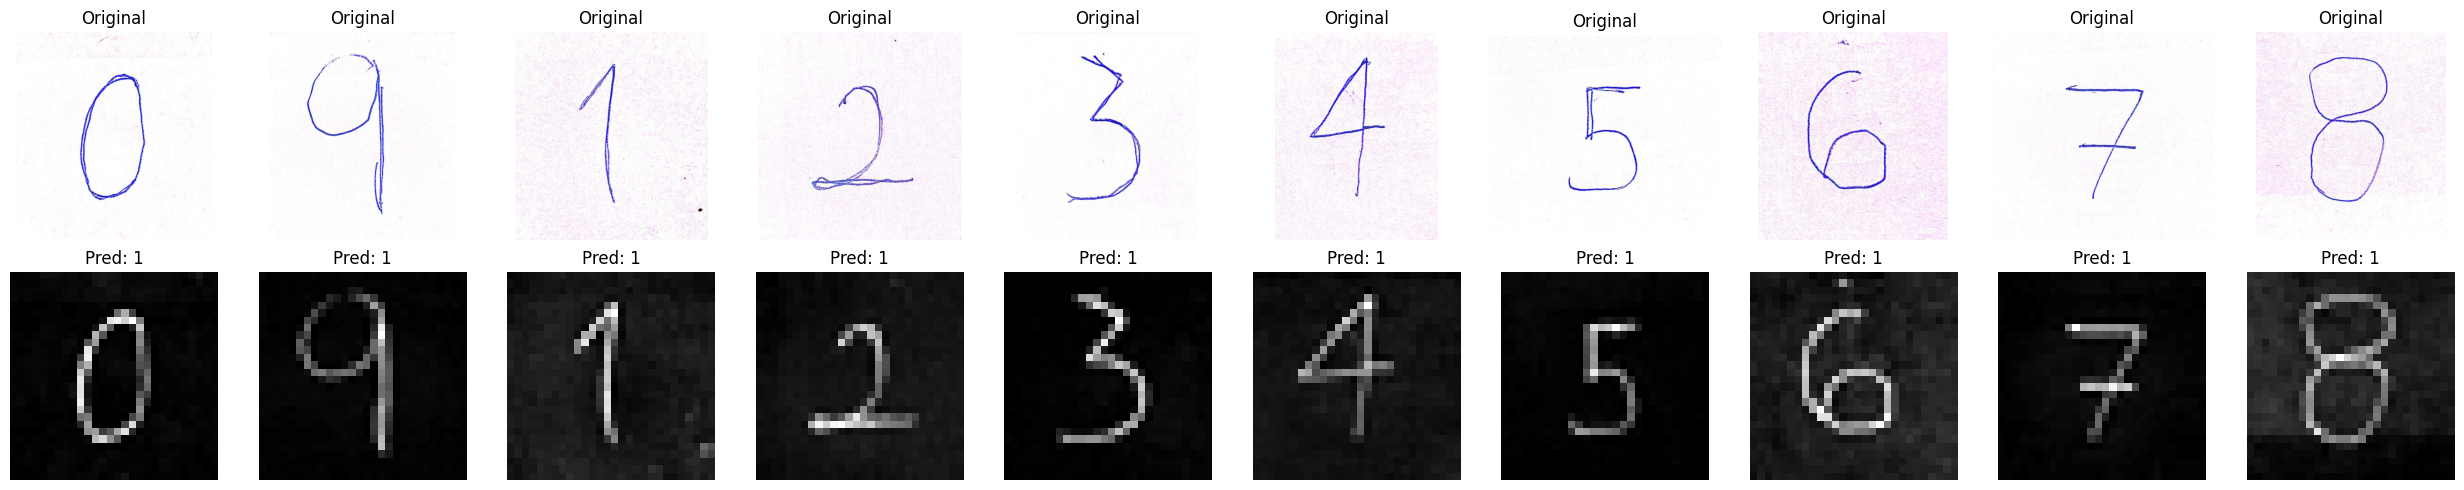

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# --- Paso 1: Cargar dataset MNIST real desde openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

# --- Paso 2: Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Paso 3: Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(f"Accuracy en test set: {knn.score(X_test, y_test):.4f}")

# --- Paso 4: Cargar tus imágenes desde Drive
import os
from google.colab import drive
drive.mount('/content/drive')

image_dir = '/content/drive/MyDrive/image_test'
image_filenames = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

predictions = []
original_imgs = []
processed_imgs = []

for filename in image_filenames:
    img_path = os.path.join(image_dir, filename)

    # 1. Cargar imagen en escala de grises
    img = Image.open(img_path).convert('L')

    # 2. Invertir colores (MNIST es fondo negro, dígito blanco)
    img = ImageOps.invert(img)

    # 3. Redimensionar a 28x28
    img = img.resize((28, 28))

    # 4. Convertir a array normalizado
    img_array = np.array(img).astype('float32') / 255.0
    img_flat = img_array.flatten().reshape(1, -1)

    # Guardar para graficar
    original_imgs.append(Image.open(img_path))
    processed_imgs.append(img_array)

    # 5. Predecir
    pred = knn.predict(img_flat)[0]
    predictions.append(pred)

# --- Paso 5: Visualizar imágenes originales y predicciones
fig, axes = plt.subplots(2, len(original_imgs), figsize=(2.5 * len(original_imgs), 5))

for i in range(len(original_imgs)):
    # Original
    axes[0, i].imshow(original_imgs[i], cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # Procesada
    axes[1, i].imshow(processed_imgs[i], cmap='gray')
    axes[1, i].set_title(f'Pred: {predictions[i]}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


"""
Rain Prediction Using WeatherAUS Dataset with KNN and Logistic Regression
========================================================================

This notebook explores rain prediction using historical weather data from various Australian cities.
It demonstrates a complete machine learning pipeline—from data preprocessing to model evaluation—using
two interpretable classifiers: K-Nearest Neighbors (KNN) and Logistic Regression.

Overview
--------
- Data Source: `weatherAUS.csv` (available at [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package))
- Task: Predict the binary variable `RainTomorrow` (Yes/No) using selected meteorological attributes
- Models Used:
  - KNN (scikit-learn implementation with tuned k=30)
  - Logistic Regression with custom decision threshold (0.6)
- Evaluation Metrics:
  - Accuracy, Precision, Recall, ROC AUC, Confusion Matrix
  - Visualizations: ROC curve, Sensitivity vs Specificity plot
- Feature Selection:
  - Based on correlation threshold (> 0.2) with the target variable

Use Cases Simulated
-------------------
The notebook includes manually constructed synthetic scenarios to test model predictions under various
weather conditions, such as:
- Typical average day
- Dry/stable and extreme variations
- Historical real-world examples from the training and testing sets
- High humidity and rainy indicators
- Storm-like pressure and cloud signals

Environment
-----------
- Google Colab Notebook
- Python 3.9+
- Libraries: numpy, pandas, matplotlib, scikit-learn

Note
----
This notebook can serve as a foundation for building more advanced rain prediction systems, integrating
external sources such as satellite data, real-time APIs, or deep learning models.

Author: Joseph David Jiménez Zúñiga

Github: Heineken97

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Caracteristicas seleccionadas basadas en correlacion:
['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']

Accuracy con KNN (scikit-learn): 0.850
Accuracy con Regresion Logistica (threshold 0.6): 0.848

Metricas para KNN:
Accuracy: 0.850
Precision: 0.770
Recall: 0.460
Correctas: 14381.0 de 16926

AUC (Regresion Logistica): 0.883


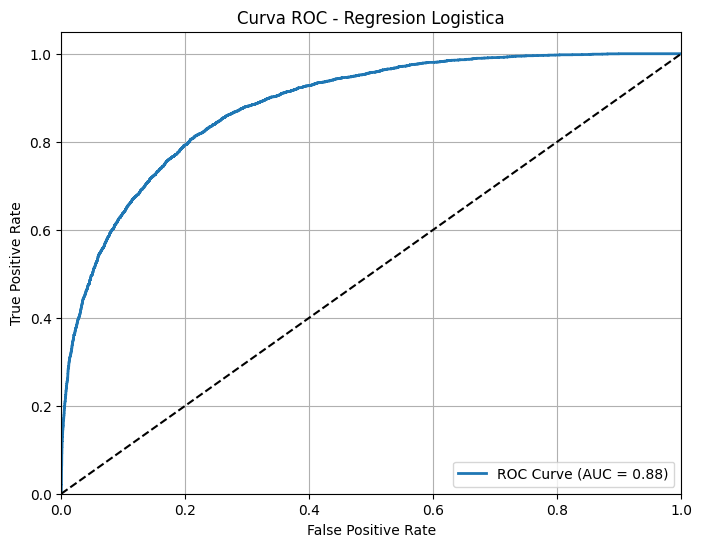

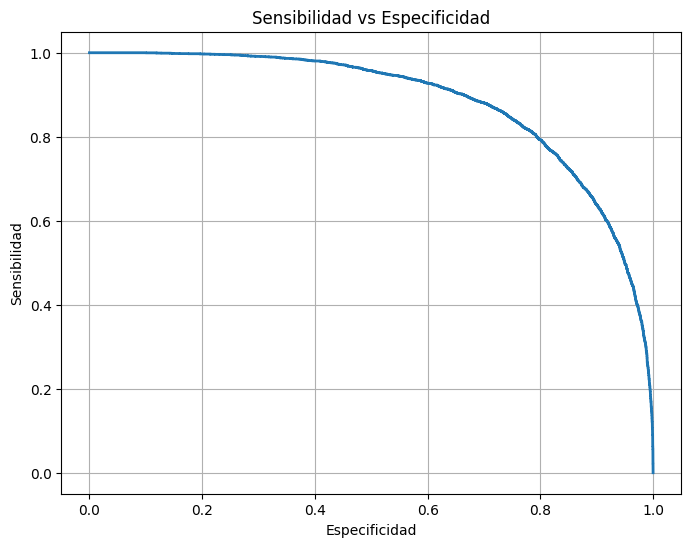


=== Analisis de Casos de Uso Simulados ===

📌 Caso 1: Condicion promedio tipica
   ➤ Regresión Logística:
     - Probabilidad de lluvia: 0.127
     - Prediccion final (umbral 0.6): ☀️ No lluvia
   ➤ KNN:
     - Prediccion final: ☀️ No lluvia
   ➤ Variables simuladas (normalizadas, primeras 5): [0.01  0.533 0.277 0.659 0.496]

📌 Caso 2: Condicion mas seca/estable (valores -20%)
   ➤ Regresión Logística:
     - Probabilidad de lluvia: 0.115
     - Prediccion final (umbral 0.6): ☀️ No lluvia
   ➤ KNN:
     - Prediccion final: ☀️ No lluvia
   ➤ Variables simuladas (normalizadas, primeras 5): [0.008 0.427 0.222 0.527 0.397]

📌 Caso 3: Condicion mas extrema (valores +20%)
   ➤ Regresión Logística:
     - Probabilidad de lluvia: 0.139
     - Prediccion final (umbral 0.6): ☀️ No lluvia
   ➤ KNN:
     - Prediccion final: ☀️ No lluvia
   ➤ Variables simuladas (normalizadas, primeras 5): [0.012 0.64  0.333 0.79  0.595]

📌 Caso 4: Dia real del entrenamiento
   ➤ Regresión Logística:
     - Probab

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    auc
)

from google.colab import drive
drive.mount('/content/drive')

# ----------- Cargar y limpiar el dataset -----------
dataset_path = '/content/drive/MyDrive/image_test/weatherAUS.csv'
df = pd.read_csv(dataset_path).dropna().reset_index(drop=True)

# Codificar fechas y variables categoricas
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Location'], prefix='Location')

# Codificar columnas de direccion de viento
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
le = LabelEncoder()
for col in wind_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Codificar variables binarias
binary_cols = ['RainToday', 'RainTomorrow']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# ----------- Seleccion de caracteristicas -----------
cor_matrix = abs(df.corr())
threshold = 0.2
significant_features = cor_matrix['RainTomorrow'][cor_matrix['RainTomorrow'] > threshold]
features = significant_features.index.tolist()
features.remove('RainTomorrow')  # Remover la variable objetivo de las features

print("Caracteristicas seleccionadas basadas en correlacion:")
print(features)

X = df[features].values
y = df['RainTomorrow'].values

# Normalizacion
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# ----------- Separar conjunto de entrenamiento y prueba -----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# ----------- KNN con scikit-learn -----------
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"\nAccuracy con KNN (scikit-learn): {knn_accuracy:.3f}")

# ----------- Regresion logistica -----------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_probs = log_model.predict_proba(X_test)[:, 1]
log_preds = (log_probs >= 0.6).astype(int)

log_accuracy = accuracy_score(y_test, log_preds)
print(f"Accuracy con Regresion Logistica (threshold 0.6): {log_accuracy:.3f}")

# ----------- Metricas detalladas para KNN -----------
print("\nMetricas para KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, zero_division=0):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, zero_division=0):.3f}")
print(f"Correctas: {accuracy_score(y_test, y_pred_knn, normalize=False)} de {len(y_test)}")

# ----------- AUC y curva ROC para Regresion Logistica -----------
try:
    auc_score = roc_auc_score(y_test, log_probs)
    print(f"\nAUC (Regresion Logistica): {auc_score:.3f}")
except ValueError:
    print("No se pudo calcular AUC.")

fpr, tpr, thresholds = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresion Logistica')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ----------- Curva de sensibilidad vs especificidad -----------
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Sensibilidad vs Especificidad')
plt.grid(True)
plt.show()

# ----------- Casos de prueba al final -----------

print("\n=== Analisis de Casos de Uso Simulados ===")

# Simulaciones diseñadas (manualmente ajustadas)
simulated_cases = [
    {
        "desc": "Condicion promedio tipica",
        "data": X.mean(axis=0)
    },
    {
        "desc": "Condicion mas seca/estable (valores -20%)",
        "data": X.mean(axis=0) * 0.8
    },
    {
        "desc": "Condicion mas extrema (valores +20%)",
        "data": X.mean(axis=0) * 1.2
    },
    {
        "desc": "Dia real del entrenamiento",
        "data": X_train[0]
    },
    {
        "desc": "Dia real del test",
        "data": X_test[10]
    },
    {
        "desc": "Alta humedad y lluvia previa (probable lluvia)",
        "data": np.array([0.01, 0.3, 0.5, 0.95, 0.9, 0.4, 0.4, 0.9, 0.95, 1.0] + [0]*(X.shape[1]-10))
    },
    {
        "desc": "Tormenta esperada: nubosidad + presion baja",
        "data": np.array([0.02, 0.2, 0.7, 0.9, 0.85, 0.1, 0.1, 1.0, 1.0, 1.0] + [0]*(X.shape[1]-10))
    }
]

for i, case in enumerate(simulated_cases):
    sample = case["data"]
    prob = log_model.predict_proba(sample.reshape(1, -1))[0, 1]
    pred_log = "🌧️ Lluvia" if prob >= 0.6 else "☀️ No lluvia"
    pred_knn = "🌧️ Lluvia" if knn_model.predict(sample.reshape(1, -1))[0] == 1 else "☀️ No lluvia"

    print(f"\n📌 Caso {i+1}: {case['desc']}")
    print(f"   ➤ Regresión Logística:")
    print(f"     - Probabilidad de lluvia: {prob:.3f}")
    print(f"     - Prediccion final (umbral 0.6): {pred_log}")
    print(f"   ➤ KNN:")
    print(f"     - Prediccion final: {pred_knn}")
    print(f"   ➤ Variables simuladas (normalizadas, primeras 5): {sample[:5].round(3)}")


# 📘 Machine Learning Application: Predicting Student Performance

Demonstrates a practical machine learning pipeline that predicts student pass/fail outcomes based on performance in assessments. It merges multiple grade matrices from CSV files and applies classification algorithms to support data-driven academic decisions.

## 🚀 Overview

- **Objective:** Predict whether a student passes (≥ 67.5) based on scores in "Examen 1", "Examen 2", and "Quiz1".
- **Models Used:**
  - K-Nearest Neighbors (KNN)
  - Logistic Regression

## 🧪 Methodology

1. **Data Preparation:**
   - Load and concatenate multiple CSV files containing student scores.
   - Identify the final grade column and binarize it for classification.
   - Select relevant features and clean missing values.

2. **Preprocessing:**
   - Normalize features using MinMaxScaler.
   - Split data into training and testing sets with stratified sampling.

3. **Model Training & Tuning:**
   - Automatically adjust `n_neighbors` for KNN based on sample size.
   - Set logistic regression threshold to 0.6 for predictive sensitivity.

4. **Model Evaluation:**
   - Compare models on accuracy, precision, recall, and AUC.
   - Visualize ROC curve and sensitivity vs specificity trade-offs.
   - Generate real-life test cases to simulate predictions.

- **KNN outperformed Logistic Regression in general accuracy**, making it more robust for typical cases.
- **Logistic Regression excelled at identifying true positives**, useful when false positives are tolerable.
- **ROC and threshold analysis** help tune decision boundaries for specific educational goals.

## 🎯 Applications

- Early identification of students at academic risk
- Data-driven curriculum adjustment and grading support
- Support for automated assessment and feedback tools


Author: Joseph David Jiménez Zúñiga

Github: Heineken97

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Columna de nota final usada: Final
✅ Usando columnas para X: ['Examen 1 25.0%', 'Examen 2 25.0%', 'Quiz1']
🔧 Usando n_neighbors = 5 (de 63 muestras de entrenamiento)

=== Modelo Comparativo ===
KNN Accuracy:              0.750
Logistic Regression Acc.:  0.583

=== Metricas Regressión Logistica ===
Accuracy:  0.583
Precision: 1.000
Recall:    0.286
AUC:       0.786


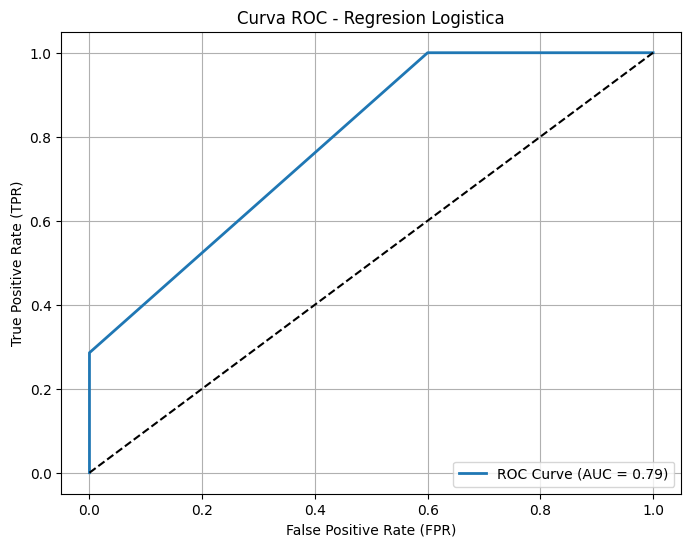

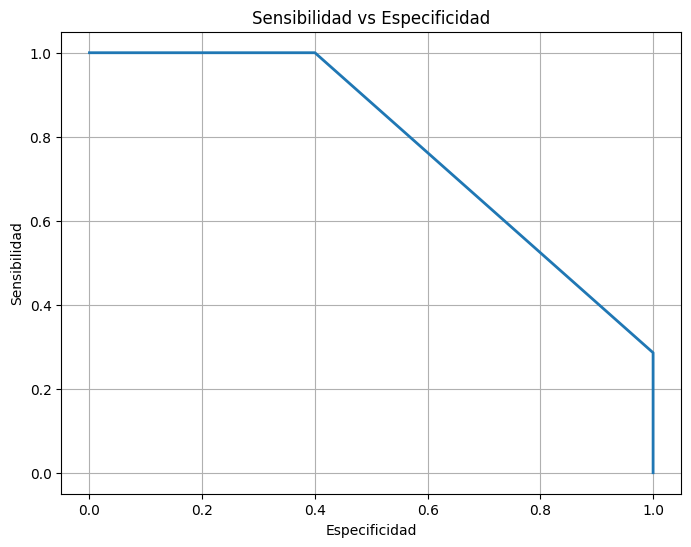


Sensibilidad (threshold = 0.5): 0.00
Especificidad (threshold = 0.5): 1.00

=== Casos de uso para probar modelos ===
Caso 1: KNN pred = 0, LogReg pred = 1, Probabilidad logreg = 0.526
Caso 2: KNN pred = 0, LogReg pred = 1, Probabilidad logreg = 0.598
Caso 3: KNN pred = 1, LogReg pred = 0, Probabilidad logreg = 0.423

=== Casos de uso para probar modelos ===

Caso 1:
  Caracteristicas: Examen 1=45, Examen 2=50, Quiz1=10
  Predicción KNN: Reprobado
  Predicción Regresion Logistica: Reprobado
  Probabilidad de aprobar (Regresion Logistica): 0.35

Caso 2:
  Caracteristicas: Examen 1=70, Examen 2=75, Quiz1=22
  Predicción KNN: Reprobado
  Predicción Regresion Logistica: Aprobado
  Probabilidad de aprobar (Regresion Logistica): 0.53

Caso 3:
  Caracteristicas: Examen 1=85, Examen 2=90, Quiz1=28
  Predicción KNN: Aprobado
  Predicción Regresion Logistica: Aprobado
  Probabilidad de aprobar (Regresion Logistica): 0.63


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    auc
)

from google.colab import drive
drive.mount('/content/drive')

# ------------ Cargar y combinar archivos ------------
file_paths = [
    "/content/drive/MyDrive/image_test/matrix-Eval-Introduccion A La Programacion GR 5.csv",
    "/content/drive/MyDrive/image_test/matrix-Eval-Introduccion A La Programacion GR 5 (1).csv",
    "/content/drive/MyDrive/image_test/matrix-Eval-Introduccion A La Programacion GR 4.csv",
    "/content/drive/MyDrive/image_test/matrix-Eval-Introduccion A La Programacion GR 4 (1).csv",
    "/content/drive/MyDrive/image_test/matrix-Eval-Introduccion A La Programacion GR 4 (2).csv"
]

dfs = [pd.read_csv(path) for path in file_paths]
dataset = pd.concat(dfs, ignore_index=True).drop_duplicates().reset_index(drop=True)

# ------------ Detectar columna 'Final' valida ------------
final_col_candidates = [col for col in dataset.columns if 'Final' in col and dataset[col].dtype != 'O']
if not final_col_candidates:
    raise ValueError("❌ No se encontro una columna numerica que contenga 'Final' en el nombre.")
final_col = final_col_candidates[0]
print(f"✅ Columna de nota final usada: {final_col}")

# ------------ Convertir a numerico y limpiar ------------
dataset[final_col] = pd.to_numeric(dataset[final_col], errors='coerce')
dataset = dataset.dropna(subset=[final_col])

# ------------ Binarizar la nota final ------------
dataset["F"] = (dataset[final_col] >= 67.5).astype(int)

# ------------ Seleccion fija de columnas relevantes para caracteristicas ------------
features = ['Examen 1 25.0%', 'Examen 2 25.0%', 'Quiz1']
features = [f for f in features if f in dataset.columns]
if not features:
    raise ValueError("❌ No se encontraron columnas validas para entrenamiento.")
print(f"✅ Usando columnas para X: {features}")

# ------------ Preparar X e y ------------
X = dataset[features].apply(pd.to_numeric, errors='coerce')
y = dataset["F"]

# Rellenar nulos con la media de cada columna para evitar filas eliminadas
X = X.fillna(X.mean())

# ------------ División estratificada para train y test ------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=45, stratify=y)

# ------------ Escalado ------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------ Ajustar n_neighbors dinámicamente ------------
n_train_samples = len(X_train)
n_neighbors = min(5, n_train_samples)
print(f"🔧 Usando n_neighbors = {n_neighbors} (de {n_train_samples} muestras de entrenamiento)")

# ------------ KNN ------------
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# ------------ Regresión Logística ------------
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train_scaled, y_train)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
log_preds = (log_probs >= 0.6).astype(int)
log_accuracy = accuracy_score(y_test, log_preds)

# ------------ Comparación ------------
print("\n=== Modelo Comparativo ===")
print(f"KNN Accuracy:              {knn_accuracy:.3f}")
print(f"Logistic Regression Acc.:  {log_accuracy:.3f}")

# ------------ Métricas Logística ------------
print("\n=== Metricas Regressión Logistica ===")
print(f"Accuracy:  {accuracy_score(y_test, log_preds):.3f}")
print(f"Precision: {precision_score(y_test, log_preds, zero_division=0):.3f}")
print(f"Recall:    {recall_score(y_test, log_preds, zero_division=0):.3f}")

try:
    auc_score = roc_auc_score(y_test, log_probs)
    print(f"AUC:       {auc_score:.3f}")
except ValueError:
    print("⚠️ AUC no se pudo calcular (clases insuficientes).")

# ------------ Curva ROC ------------
fpr, tpr, thresholds = roc_curve(y_test, log_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regresion Logistica')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ------------ Sensibilidad vs Especificidad ------------
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Sensibilidad vs Especificidad')
plt.grid(True)
plt.show()

# ------------ Valores a umbral 0.5 ------------
threshold = 0.5
idx = np.argmax(thresholds >= threshold)
sensitivity_at_thresh = tpr[idx]
specificity_at_thresh = 1 - fpr[idx]

print(f"\nSensibilidad (threshold = {threshold}): {sensitivity_at_thresh:.2f}")
print(f"Especificidad (threshold = {threshold}): {specificity_at_thresh:.2f}")

# ------------ Casos de uso para probar modelos ------------
print("\n=== Casos de uso para probar modelos ===")

# Crear casos de prueba con valores medios
test_cases = pd.DataFrame({
    'Examen 1 25.0%': [70, 80, 60],
    'Examen 2 25.0%': [75, 85, 55],
    'Quiz1': [20, 25, 15]
})

test_cases_scaled = scaler.transform(test_cases)

knn_preds = knn_model.predict(test_cases_scaled)
log_preds_cases = log_model.predict(test_cases_scaled)
log_probs_cases = log_model.predict_proba(test_cases_scaled)[:, 1]

for i, (knn_p, log_p, log_pr) in enumerate(zip(knn_preds, log_preds_cases, log_probs_cases), 1):
    print(f"Caso {i}: KNN pred = {knn_p}, LogReg pred = {log_p}, Probabilidad logreg = {log_pr:.3f}")

# ------------ Casos de uso ------------
print("\n=== Casos de uso para probar modelos ===")

test_cases = pd.DataFrame({
    'Examen 1 25.0%': [45, 70, 85],  # Caso con nota baja, media y alta
    'Examen 2 25.0%': [50, 75, 90],
    'Quiz1': [10, 22, 28]
})

test_cases_scaled = scaler.transform(test_cases)

knn_preds = knn_model.predict(test_cases_scaled)
log_preds_cases = log_model.predict(test_cases_scaled)
log_probs_cases = log_model.predict_proba(test_cases_scaled)[:, 1]

for i, (knn_p, log_p, log_pr) in enumerate(zip(knn_preds, log_preds_cases, log_probs_cases), 1):
    print(f"\nCaso {i}:")
    print(f"  Caracteristicas: Examen 1={test_cases.iloc[i-1, 0]}, Examen 2={test_cases.iloc[i-1, 1]}, Quiz1={test_cases.iloc[i-1, 2]}")
    print(f"  Predicción KNN: {'Aprobado' if knn_p == 1 else 'Reprobado'}")
    print(f"  Predicción Regresion Logistica: {'Aprobado' if log_p == 1 else 'Reprobado'}")
    print(f"  Probabilidad de aprobar (Regresion Logistica): {log_pr:.2f}")


# 📘 Bankruptcy Prediction Using Logistic Regression

Approach to financial risk classification using logistic regression. It analyzes bankruptcy probability based on key financial indicators, offering valuable insight for auditors, financial analysts, and compliance officers.

## 🧠 Objective

- Predict bankruptcy status (`Bankrupt?`) based on correlated financial features.
- Evaluate model performance using comprehensive metrics.
- Simulate test cases to assess model behavior under realistic conditions.

## 🔧 Methodology

1. **Data Preparation**
   - Imported and cleaned bankruptcy dataset from CSV.
   - Removed null entries to maintain data integrity.

2. **Feature Selection**
   - Selected 10 features highly correlated with bankruptcy status, including:
     - ROA(C), ROA(A), ROA(B)
     - Persistent EPS
     - Per Share Net Profit
     - Debt Ratio %
     - Net Worth / Assets
     - Profitability ratios

3. **Preprocessing & Training**
   - Data split using stratified train/test division (15% test).
   - Features normalized using MinMaxScaler.
   - Logistic regression trained with extended iterations for convergence.

4. **Evaluation Metrics**
   - **Accuracy:** — strong overall classification capability.
   - **Precision:** — moderate ability to correctly classify bankrupt firms.
   - **Recall:** — low sensitivity; many bankruptcies may be missed.
   - **AUC Score:** — excellent model discrimination.
   - **Sensitivity:**| **Specificity:** — highly conservative threshold behavior.

These results demonstrate that the model flags bankruptcy risks when indicators trend negatively, even with moderate ROA or profitability values. However, the threshold of 0.5 combined with low recall suggests the need for potential threshold tuning or balancing techniques in future iterations.

## 🎯 Applications

- **Credit Risk Analysis:** Prioritize financial due diligence in lending.
- **Audit Flagging Systems:** Highlight companies with financial distress indicators.
- **Corporate Governance:** Provide early warnings for restructuring or compliance.
- **Research & Education:** Support finance students in applied ML for predictive modeling.

Author: Joseph David Jiménez Zúñiga

Github: Heineken97

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features seleccionadas basadas en correlacion:
[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Net Income to Total Assets']

Accuracy en dataset de bancarrota con Regresion Logistica: 0.969

Métricas de evaluacion:
Accuracy:  0.969
Precision: 0.571
Recall:    0.121
AUC Score: 0.916


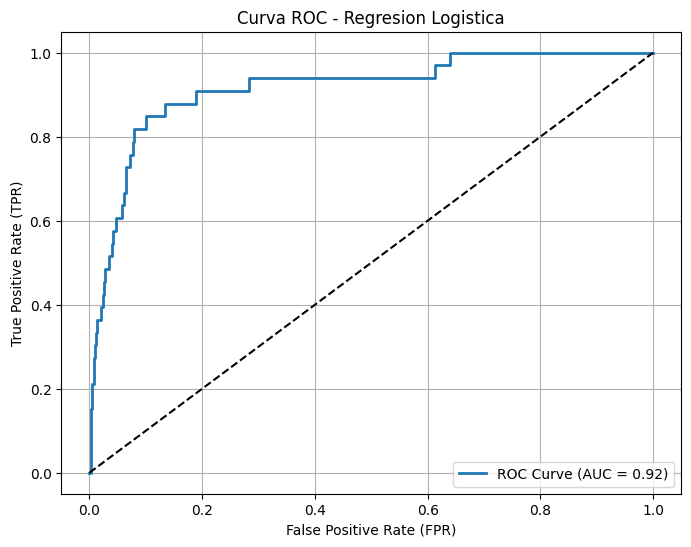

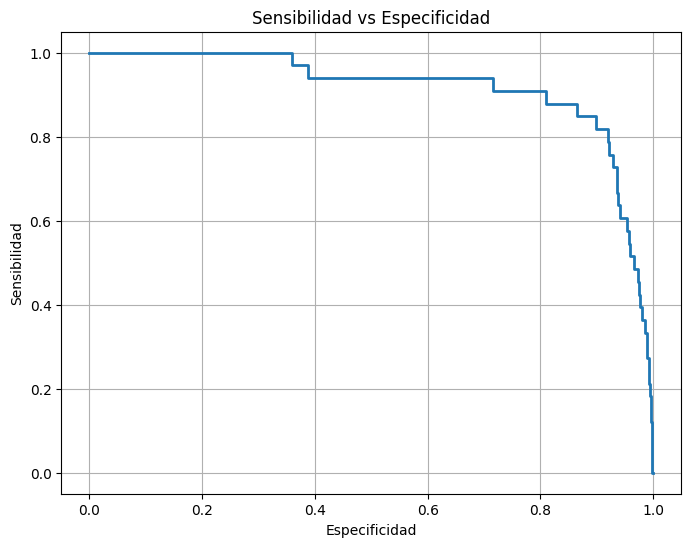


Sensibilidad (threshold = 0.5): 0.00
Especificidad (threshold = 0.5): 1.00

=== Casos de uso para probar modelo de Regresion Logistica ===

Caso 1:
ROA(C) before interest and depreciation before interest    0.200000
ROA(A) before interest and % after tax                     0.100000
ROA(B) before interest and depreciation after tax          0.300000
Persistent EPS in the Last Four Seasons                    0.799205
Per Share Net profit before tax (Yuan ¥)                   0.102007
Debt ratio %                                               0.672040
Net worth/Assets                                           0.687130
Net profit before tax/Paid-in capital                      0.383974
Retained Earnings to Total Assets                          0.417788
Net Income to Total Assets                                 0.454256
Name: 0, dtype: float64
Prediccion: En Bancarrota
Probabilidad de bancarrota: 0.99

Caso 2:
ROA(C) before interest and depreciation before interest    0.500000
ROA(A) befo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    auc
)

from google.colab import drive
drive.mount('/content/drive')

# ------------ Cargar dataset ------------
dataset_bank = pd.read_csv("/content/drive/MyDrive/image_test/dataBankruptcy.csv")
dataset_bank = dataset_bank.dropna().copy()  # Eliminar filas con NA por seguridad

# ------------ Seleccion de caracteristicas por correlacion ------------
correlation_matrix = dataset_bank.corr()
correlation_threshold = 0.2
significant_features = correlation_matrix['Bankrupt?'][abs(correlation_matrix['Bankrupt?']) > correlation_threshold]
features = significant_features.index.drop('Bankrupt?').tolist()

print("Features seleccionadas basadas en correlacion:")
print(features)

X = dataset_bank[features].values
y = dataset_bank['Bankrupt?'].values

# ------------ Division y escalado ------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------ Regresion Logistica ------------
model = LogisticRegression(max_iter=3500, solver='lbfgs')
model.fit(X_train_scaled, y_train)

probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (probs >= 0.5).astype(int)

logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy en dataset de bancarrota con Regresion Logistica: {logistic_accuracy:.3f}")

# ------------ Metricas de evaluacion ------------
print("\nMétricas de evaluacion:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.3f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.3f}")

try:
    auc_score = roc_auc_score(y_test, probs)
    print(f"AUC Score: {auc_score:.3f}")
except ValueError:
    print("AUC no pudo ser calculado (posiblemente una sola clase presente en y_true).")

# ------------ Curva ROC ------------
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regresion Logistica')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ------------ Sensibilidad vs Especificidad ------------
plt.figure(figsize=(8, 6))
plt.plot(1 - fpr, tpr, lw=2)
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Sensibilidad vs Especificidad')
plt.grid(True)
plt.show()

# ------------ Sensibilidad y Especificidad al umbral 0.5 ------------
threshold = 0.5
idx = np.argmax(thresholds >= threshold)
sensitivity = tpr[idx]
specificity = 1 - fpr[idx]

print(f"\nSensibilidad (threshold = {threshold}): {sensitivity:.2f}")
print(f"Especificidad (threshold = {threshold}): {specificity:.2f}")

# ------------ Casos de uso para probar modelos ------------
print("\n=== Casos de uso para probar modelo de Regresion Logistica ===")

# Ejemplos (usar valores en el rango que tienen las features)
test_cases = pd.DataFrame({
    features[0]: [0.2, 0.5, 0.8],
    features[1]: [0.1, 0.6, 0.7],
    features[2]: [0.3, 0.4, 0.9] if len(features) > 2 else [0.3, 0.4, 0.9],
})

# Ajustar numero de columnas
if len(features) > 3:
    for f in features[3:]:
        test_cases[f] = np.random.uniform(0, 1, size=3)

test_cases_scaled = scaler.transform(test_cases)

preds_cases = model.predict(test_cases_scaled)
probs_cases = model.predict_proba(test_cases_scaled)[:, 1]

for i, (pred, prob) in enumerate(zip(preds_cases, probs_cases), 1):
    print(f"\nCaso {i}:")
    print(test_cases.iloc[i-1])
    print(f"Prediccion: {'En Bancarrota' if pred == 1 else 'No en Bancarrota'}")
    print(f"Probabilidad de bancarrota: {prob:.2f}")


# 🧠 Age Estimation Using CNN from Facial Images

Approach to age prediction from grayscale facial images using deep learning. The model employs a Convolutional Neural Network (CNN) trained on a subset of images from the [wiki_crop](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/) dataset, a widely recognized benchmark for age estimation tasks.

## 🎯 Objective

- Train a regression CNN model to predict age from facial images.
- Evaluate model performance with error metrics.
- Display predictions visually to verify interpretability and realism.

## 🧪 Methodology

1. **Dataset Preparation:**
   - Images are extracted from wiki_crop directory in Google Drive.
   - Age is inferred by subtracting birth year (from filename) from the date of the photo.
   - Grayscale conversion and resizing to 64×64 pixels ensure computational efficiency.

2. **Data Cleaning:**
   - Discard images with unreadable format or implausible ages (<0 or >120).
   - Normalize pixel values and expand dimensions for CNN compatibility.

3. **Model Architecture:**
   - CNN composed of:
     - Two convolutional layers with ReLU activation
     - One max-pooling layer
     - Flattening layer followed by dense layers
     - Output is a single float value (predicted age)
   - Uses Mean Squared Error (MSE) as loss and Mean Absolute Error (MAE) as evaluation metric.
   - Optimized with Adam optimizer.


## 📊 Observations

- The CNN demonstrates reasonably good age estimation for mid-range ages, with MAE under 13 years.
- Outliers and older faces often introduce large prediction errors.
- Training data could benefit from augmentation and more balanced age distribution.

## 💼 Applications

- **Healthcare and aging analytics**
- **Demographic analysis in retail or security**
- **Human-computer interaction and personalization**
- **Educational tools for computer vision**

This notebook offers a strong foundation for understanding image-based regression tasks. It can be expanded with deeper architectures, transfer learning, or preprocessing enhancements for better generalization and lower error margins.

Author: Joseph David Jiménez Zúñiga

Github: Heineken97

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total imagenes encontradas: 62328
Cantidad de imagenes cargadas: 978
Entrenando modelo...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - loss: 1212.5677 - mae: 29.1724
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 554.1395 - mae: 17.7633
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 420.4116 - mae: 15.6559
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 339.1650 - mae: 14.3051
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 321.8197 - mae: 14.1968
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 306.2045 - mae: 13.4626
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 300.0013 - mae: 13.4427
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - loss: 319.0125 - mae: 14.5205
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 304.3043 - mae: 13.0644
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 313.1465 - mae: 13.9838

Evaluacion CNN - Regresion
Error cuadratico medio: 366.4315
MAE (Error Absoluto Medio): 13.5855


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,968,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,933,477 (22.63 MB)

 Trainable params: 1,977,825 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,955,652 (15.09 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


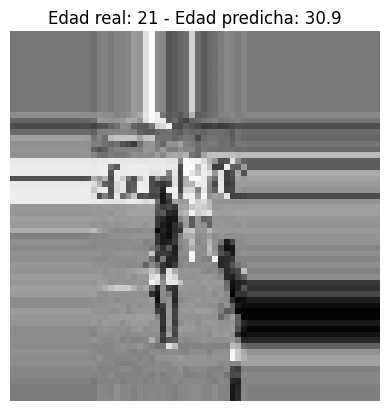

Prediccion: 30.9 | Real: 21 | Error absoluto: 9.9
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


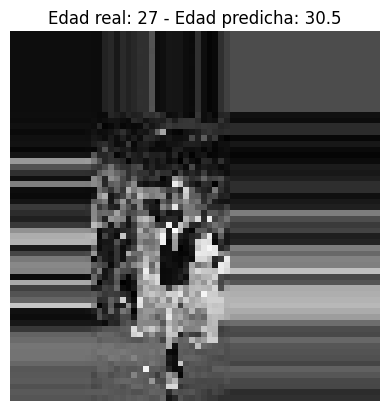

Prediccion: 30.5 | Real: 27 | Error absoluto: 3.5
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


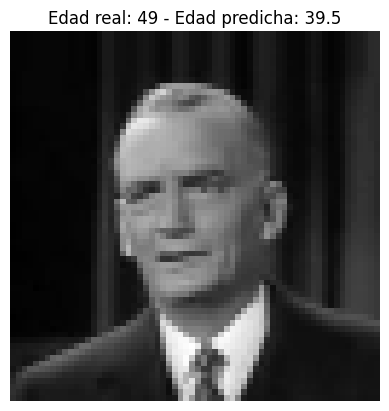

Prediccion: 39.5 | Real: 49 | Error absoluto: 9.5
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


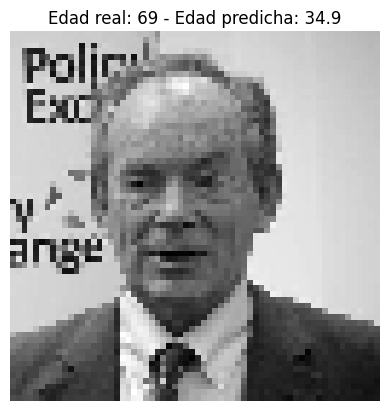

Prediccion: 34.9 | Real: 69 | Error absoluto: 34.1
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


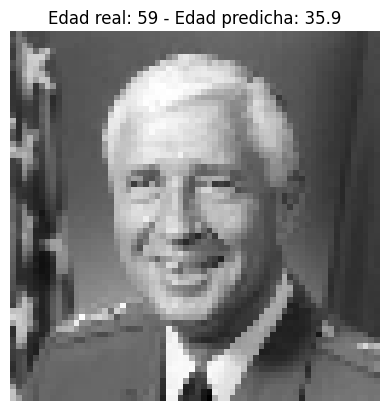

Prediccion: 35.9 | Real: 59 | Error absoluto: 23.1
--------------------------------------------------


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from google.colab import drive
from datetime import datetime
import random

# Montar Google Drive
drive.mount('/content/drive')

# Directorio
data_root = "/content/drive/MyDrive/image_test"
data_dir = os.path.join(data_root, "wiki_crop")

# Buscar imagenes .jpg
def find_images(path):
    jpg_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.jpg'):
                jpg_files.append(os.path.join(root, file))
    return jpg_files

# Extraer edad
def extraer_edad_desde_nombre(nombre_archivo):
    partes = nombre_archivo.replace('.jpg', '').split('_')
    if len(partes) < 3:
        return None
    try:
        fecha_inicio = datetime.strptime(partes[1], "%Y-%m-%d")
        anio_fin = int(partes[2])
        edad = anio_fin - fecha_inicio.year
        return edad
    except:
        return None

image_files = find_images(data_dir)
print(f"Total imagenes encontradas: {len(image_files)}")

images = []
etiquetas = []
max_images = 1000

for file_path in image_files[:max_images]:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    img = cv2.resize(img, (64, 64))
    filename = os.path.basename(file_path)
    edad = extraer_edad_desde_nombre(filename)
    if edad is None or edad > 120 or edad < 0:
        continue
    images.append(img)
    etiquetas.append(edad)

X = np.array(images)
y = np.array(etiquetas)

print(f"Cantidad de imagenes cargadas: {X.shape[0]}")

# Preparar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Modelo de regresion
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # salida continua (edad)
])

model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])
print("Entrenando modelo...")
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("\nEvaluacion CNN - Regresion")
print(f"Error cuadratico medio: {loss:.4f}")
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
model.summary()

# Mostrar imagen y prediccion
num_muestras = 5

for i in range(num_muestras):
    idx = random.randint(0, X_test.shape[0] - 1)
    imagen = X_test[idx]
    edad_real = y_test[idx]

    pred = model.predict(imagen[np.newaxis, ...])
    edad_predicha = float(pred[0][0])

    plt.imshow(imagen.squeeze(), cmap='gray')
    plt.title(f"Edad real: {edad_real} - Edad predicha: {edad_predicha:.1f}")
    plt.axis('off')
    plt.show()

    error = abs(edad_predicha - edad_real)
    print(f"Prediccion: {edad_predicha:.1f} | Real: {edad_real} | Error absoluto: {error:.1f}")
    print("-" * 50)


# 🔢 Interpreting CNN Performance on MNIST: Deep Learning in Practice

This notebook evaluates two CNN architectures using the MNIST digit dataset. Based on training logs, evaluation metrics, and prediction samples, this section offers a professional interpretation of the models' behavior and implications for practical use.

## 🧪 Key Training Observations

### CNN 1 (Basic)

- **Training convergence is extremely rapid**, reaching >99% accuracy within just 5 epochs.
- Final test accuracy: **98.69%**, with a test loss of **0.0575**.

### CNN 2 (With Dropout)

- Dropout introduces **regularization**, preventing overfitting despite slightly lower early training accuracy.
- Final test accuracy: **99.05%**, with improved generalization (test loss **0.0386**).

## ⚙️ Model Interpretation

- Both models are highly effective on MNIST, which is considered a relatively "easy" benchmark.
- **CNN 2 generalizes better**, as shown by lower test loss despite fewer parameters.
- **The warning about `input_shape`** is a Keras best practice note—it does not affect performance but suggests replacing the `input_shape=` argument with an `Input()` layer for clarity and future-proofing.

## 🔍 Sample Predictions

Both models demonstrate near-perfect classification in randomly selected samples:

- CNN 1: Correctly predicted digits like 0, 1, 2, 4.
- CNN 2: Accurately predicted digits including 0, 1, 3, 5, 6.

This consistency confirms **high confidence across diverse digit classes**.

## 📦 Recommendations for Deployment

- For embedded use cases or real-time inference, **CNN 1** offers speed with compact structure.
- For robust applications (e.g. mobile OCR, accessibility tools), **CNN 2** is preferable due to stability and resilience to input noise.
- Future enhancements may include:
  - Hyperparameter tuning
  - Learning rate scheduling
  - Confusion matrix & error analysis

These results highlight the reliability of CNNs in digit recognition and serve as a solid reference for exploring deeper architectures or dataset variants.

Author: Joseph David Jiménez Zúñiga

Github: Heineken97

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8795 - loss: 0.4031
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9905 - loss: 0.0318
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9936 - loss: 0.0193
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9951 - loss: 0.0151
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9973 - loss: 0.0089
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9973 - loss: 0.0084
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9976 - loss: 0.0078
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9977 - loss: 0.0068
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9975 - loss: 0.0082

📊 Resultados para CNN 1 (basica)
Perdida: 0.0499 | Precision: 0.9881


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,069,184 (4.08 MB)

 Trainable params: 356,394 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 712,790 (2.72 MB)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8291 - loss: 0.5533
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9732 - loss: 0.0921
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9816 - loss: 0.0624
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9839 - loss: 0.0530
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9860 - loss: 0.0463
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9888 - loss: 0.0374
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9904 - loss: 0.0309
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9915 - loss: 0.0272
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9920 - loss: 0.0240
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9921 - loss: 0.0229

📊 Resultados para CNN 2 (con dropout)
Perdida: 0.0395 | Precision: 0.9899


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)


🔍 Predicciones con CNN 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


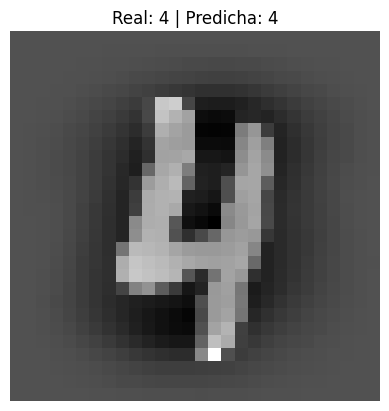

🎯 Ejemplo 1: Real = 4, Predicha = 4
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


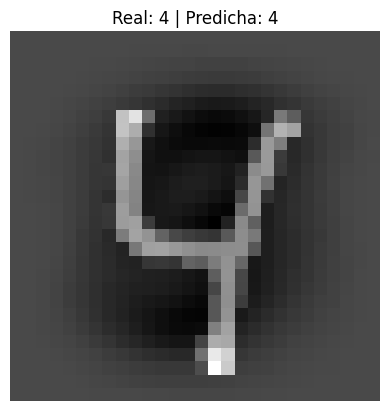

🎯 Ejemplo 2: Real = 4, Predicha = 4
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


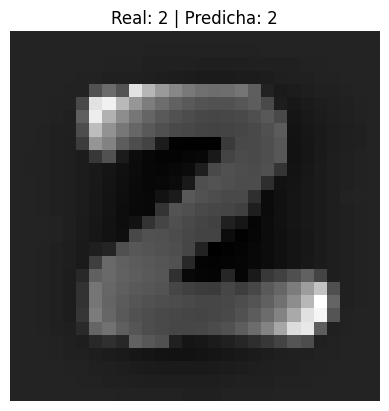

🎯 Ejemplo 3: Real = 2, Predicha = 2
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


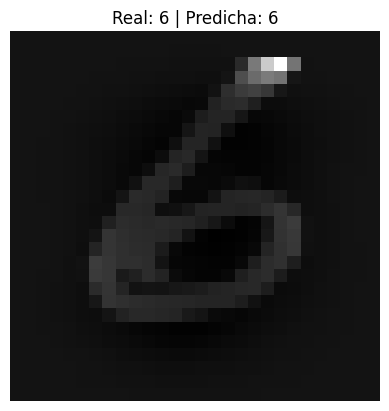

🎯 Ejemplo 4: Real = 6, Predicha = 6
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


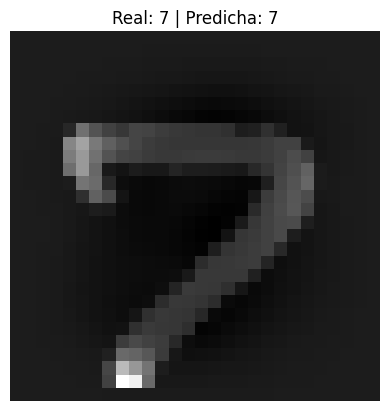

🎯 Ejemplo 5: Real = 7, Predicha = 7
----------------------------------------

🔍 Predicciones con CNN 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


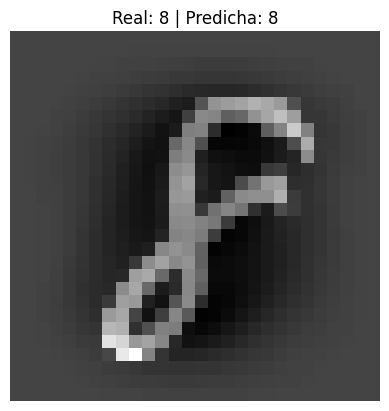

🎯 Ejemplo 1: Real = 8, Predicha = 8
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


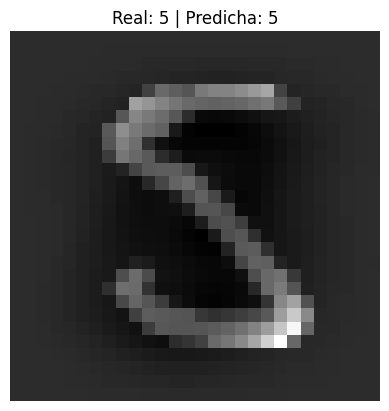

🎯 Ejemplo 2: Real = 5, Predicha = 5
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


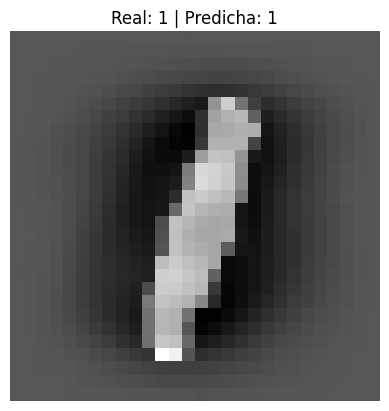

🎯 Ejemplo 3: Real = 1, Predicha = 1
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


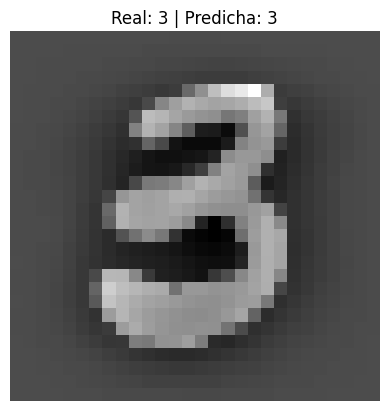

🎯 Ejemplo 4: Real = 3, Predicha = 3
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


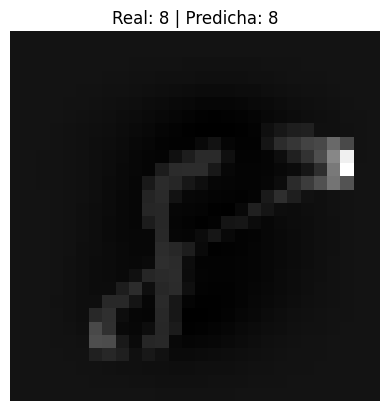

🎯 Ejemplo 5: Real = 8, Predicha = 8
----------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Cargar y preprocesar el dataset MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = StandardScaler().fit_transform(X)
X = X.reshape(-1, 28, 28, 1).astype("float32")
y = y.astype(int)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Definir modelo CNN simple
def crear_modelo_cnn1():
    model = Sequential([
        Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Definir modelo CNN con dropout
def crear_modelo_cnn2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Entrenar y evaluar ambos modelos
def entrenar_y_evaluar(model, nombre):
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1)
    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"\n📊 Resultados para {nombre}")
    print(f"Perdida: {loss:.4f} | Precision: {acc:.4f}")
    model.summary()
    return model

# Ejecutar entrenamientos
modelo_cnn1 = entrenar_y_evaluar(crear_modelo_cnn1(), "CNN 1 (basica)")
modelo_cnn2 = entrenar_y_evaluar(crear_modelo_cnn2(), "CNN 2 (con dropout)")

# Casos de uso: predecir digitos
def mostrar_predicciones(model, cantidad=5):
    for i in range(cantidad):
        idx = np.random.randint(0, X_test.shape[0])
        imagen = X_test[idx]
        etiqueta_real = y_test[idx]
        pred = model.predict(imagen[np.newaxis, ...])
        etiqueta_predicha = np.argmax(pred)

        plt.imshow(imagen.squeeze(), cmap='gray')
        plt.title(f"Real: {etiqueta_real} | Predicha: {etiqueta_predicha}")
        plt.axis('off')
        plt.show()
        print(f"🎯 Ejemplo {i+1}: Real = {etiqueta_real}, Predicha = {etiqueta_predicha}\n" + "-"*40)

# Ver predicciones en ambas redes
print("\n🔍 Predicciones con CNN 1")
mostrar_predicciones(modelo_cnn1)

print("\n🔍 Predicciones con CNN 2")
mostrar_predicciones(modelo_cnn2)